In [1]:
!pip install kaggle


In [2]:
!sudo pip install --upgrade xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.2
    Uninstalling xgboost-2.0.2:
      Successfully uninstalled xgboost-2.0.2


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d arunjangir245/german-credit-card

  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 33.1MB/s]


In [4]:
!unzip /content/german-credit-card.zip

Archive:  /content/german-credit-card.zip
  inflating: GermanCredit.csv        


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re
import matplotlib.pyplot as plt


In [6]:
file_path = "/content/GermanCredit.csv"
df = pd.read_csv(file_path)

df.head(10)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0
5,no checking account,36,existing credits paid back duly till now,retraining,9055,unknown/no savings account,1 <= ... < 4 years,2,male : single,none,...,unknown/no property,35,none,for free,1,unskilled - resident,2,yes,yes,1
6,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,... >= 7 years,3,male : single,none,...,building society savings agreement/life insurance,53,none,own,1,skilled employee/official,1,no,yes,1
7,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,none,...,car or other,35,none,rent,1,management/self-employed/highly qualified empl...,1,yes,yes,1
8,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,... >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,none,...,real estate,61,none,own,1,unskilled - resident,1,no,yes,1
9,0 <= ... < 200 DM,30,critical account/other credits existing,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,none,...,car or other,28,none,own,2,management/self-employed/highly qualified empl...,1,no,yes,0


In [7]:
df.shape

(1000, 21)

<ipython-input-8-79868aca5e3b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


(8.5, -0.5)

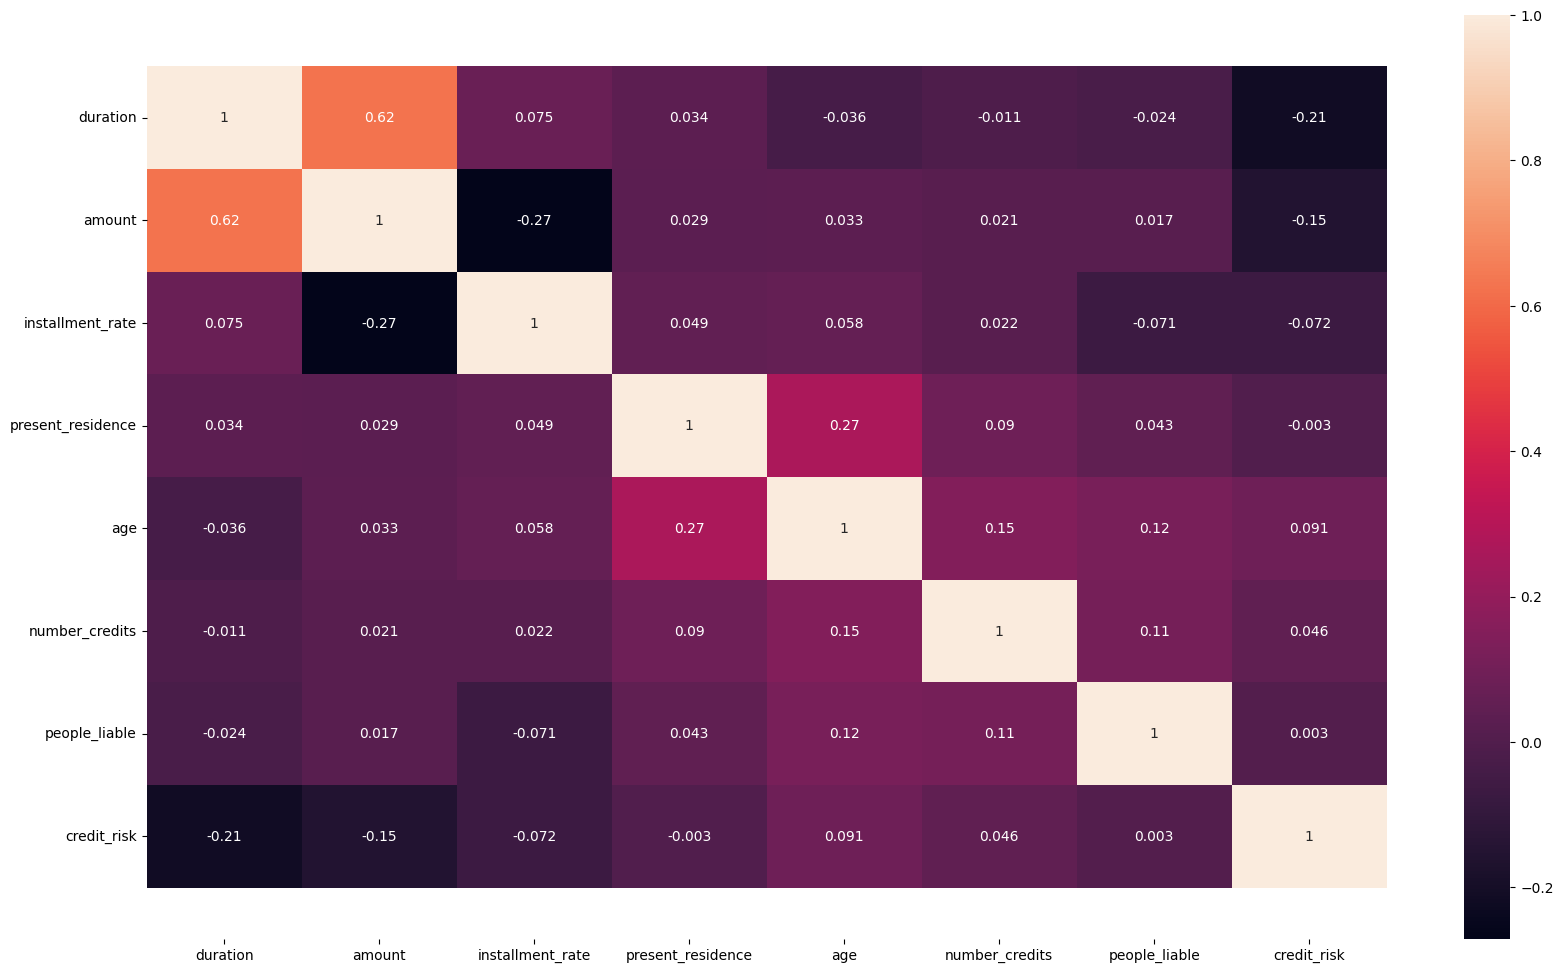

In [8]:
corr_matrix=df.corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(corr_matrix, annot = True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

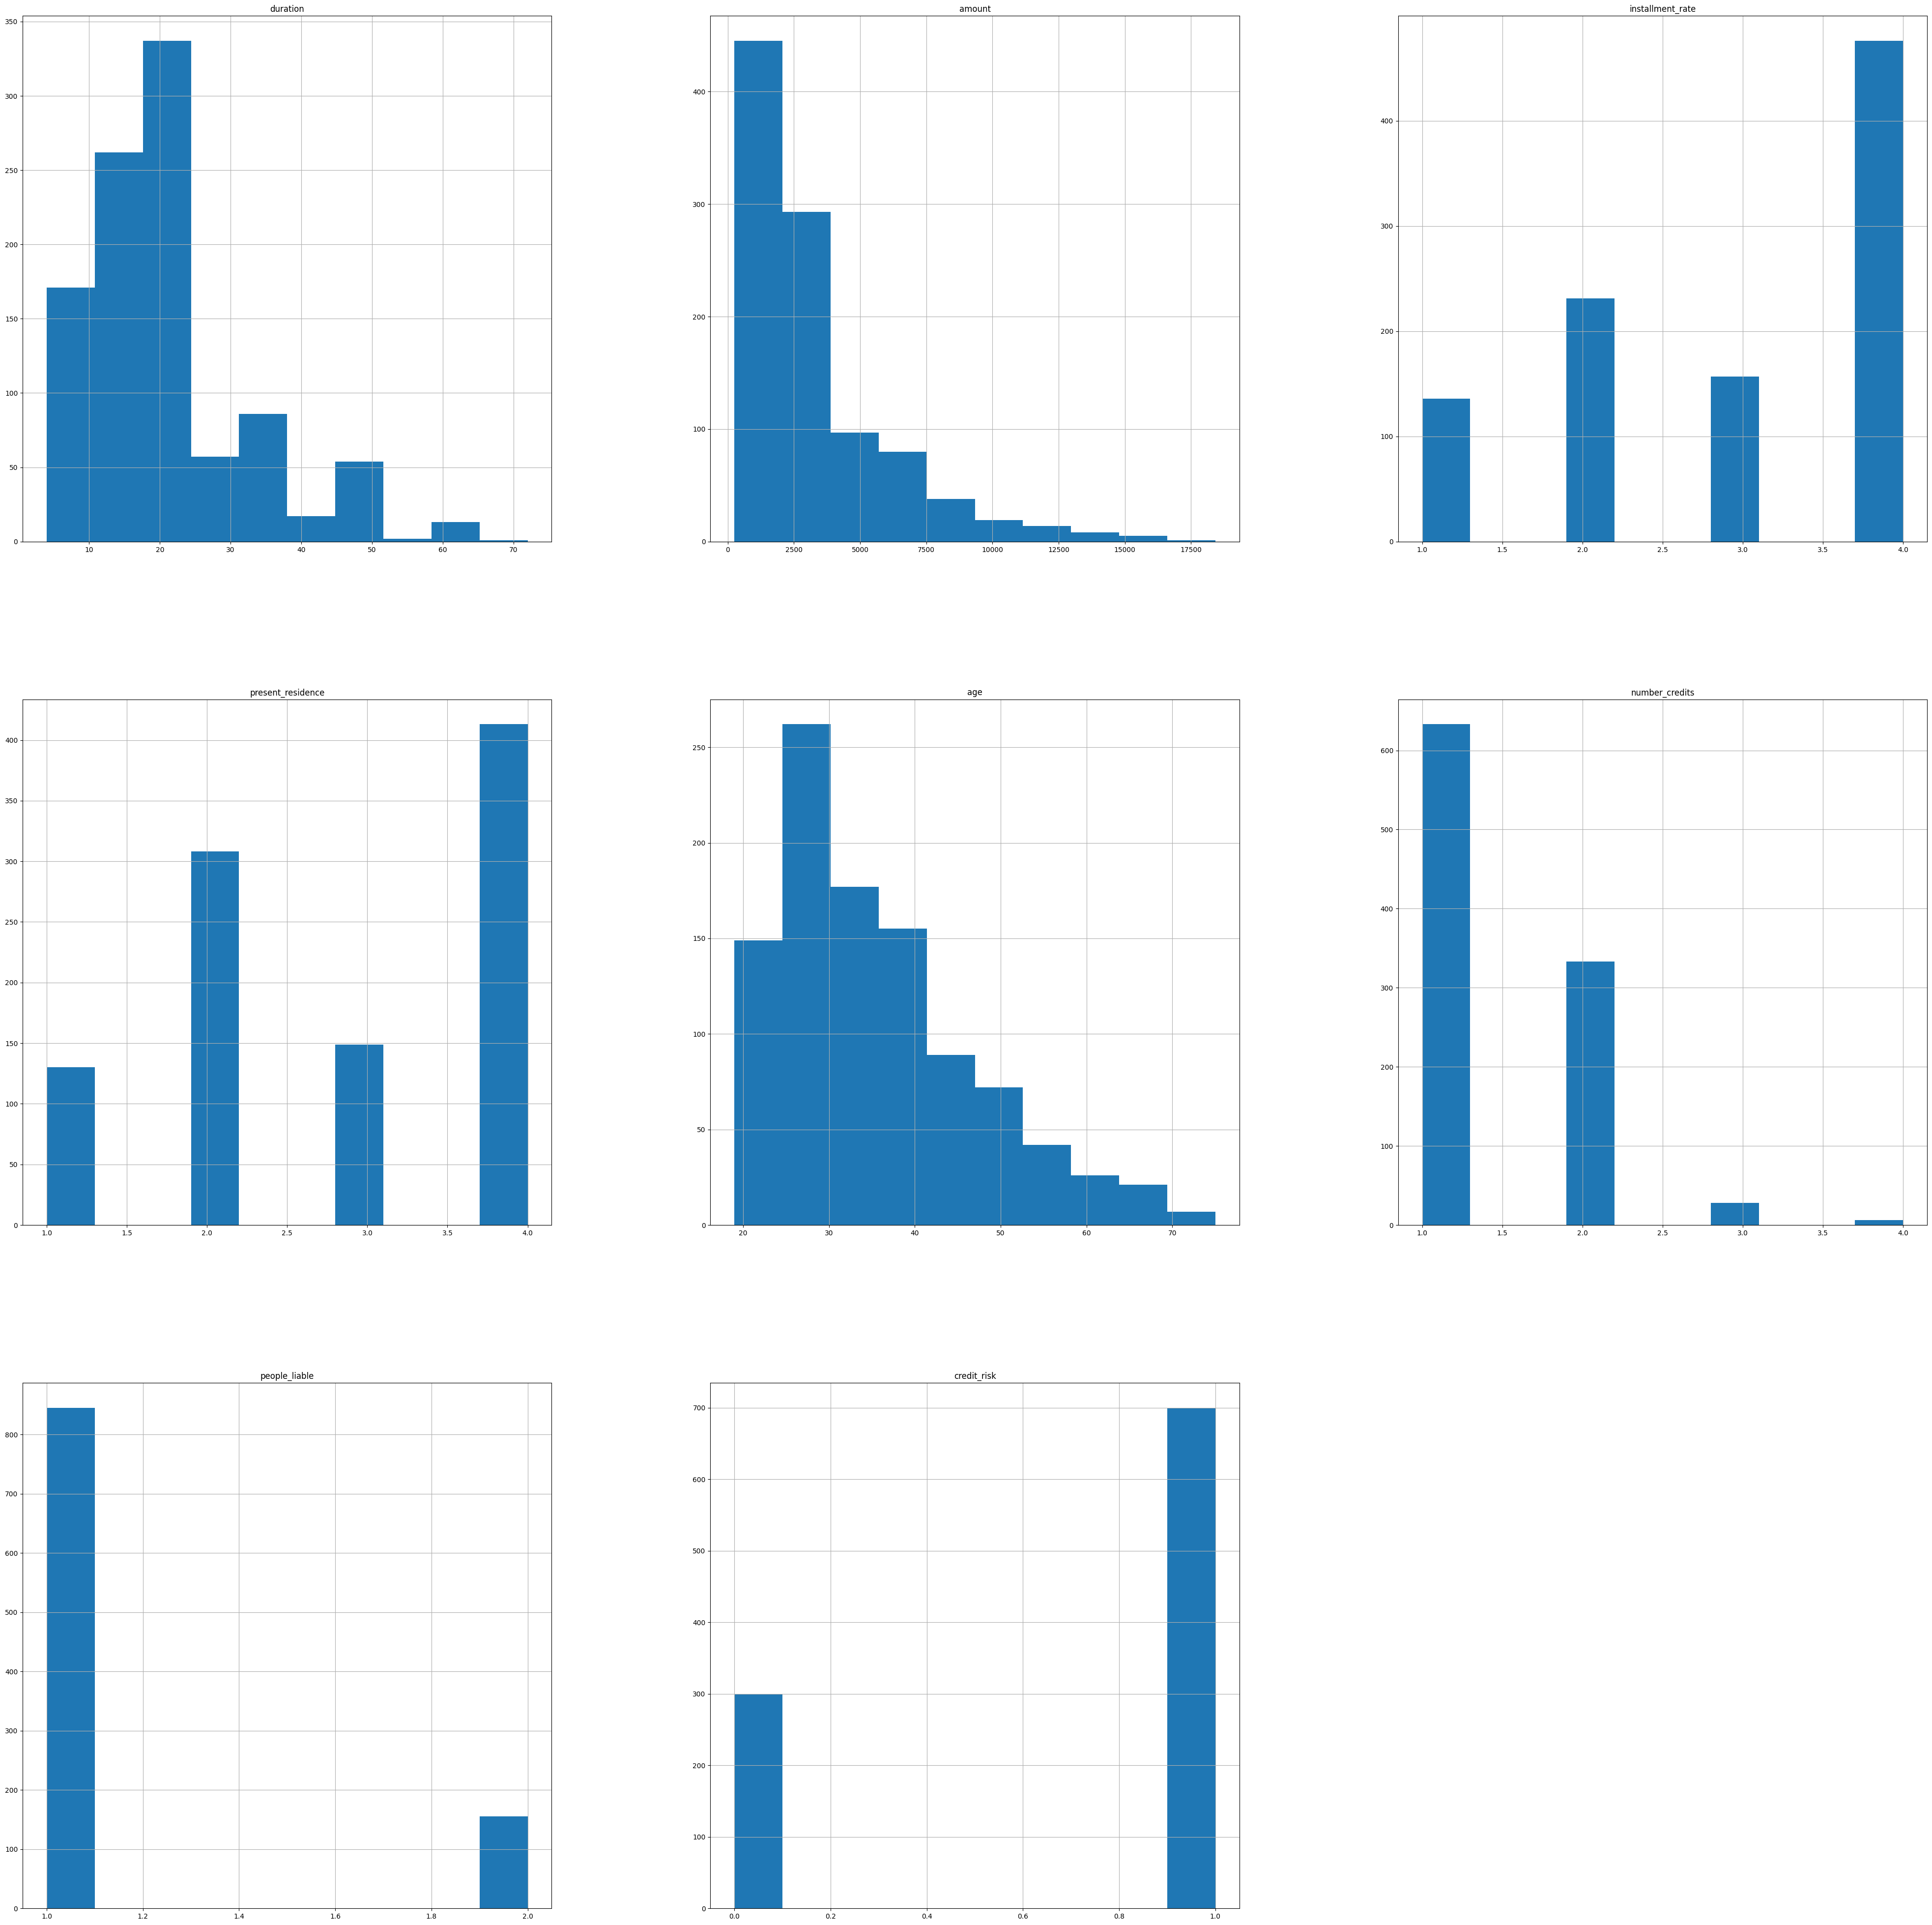

In [9]:
df.hist(figsize=(50,50))
plt.show()

In [10]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [12]:
df['credit_risk'].value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

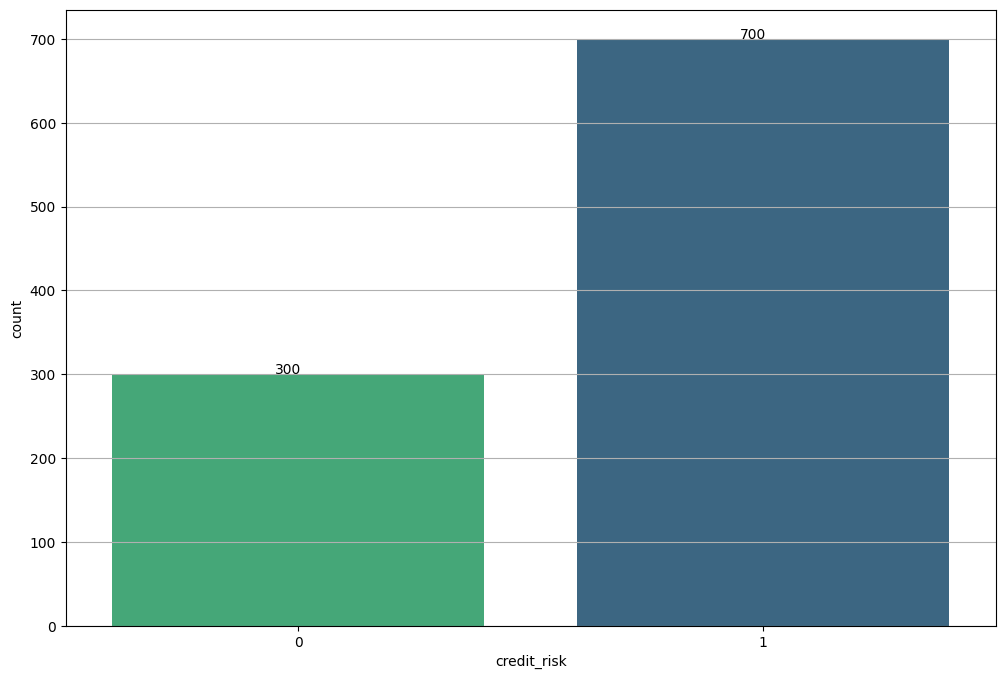

In [13]:
plt.figure(figsize = (12,8))
plt.grid(True)
ax = sns.countplot(x='credit_risk', data=df, palette='viridis_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.8))

In [14]:
X = df.drop(['credit_risk'],axis=1)
y = df['credit_risk']

In [15]:
X.shape

(1000, 20)

In [16]:
from sklearn.preprocessing import OneHotEncoder
# Separate numerical and non-numerical columns
numerical_columns = X.select_dtypes(include=np.number).columns
non_numerical_columns = X.select_dtypes(exclude=np.number).columns

# Create DataFrames for numerical and non-numerical data
numerical_X = X[numerical_columns]
non_numerical_X = X[non_numerical_columns]

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_non_numerical_data = encoder.fit_transform(non_numerical_X)
encoded_non_numerical_X = pd.DataFrame(encoded_non_numerical_data, columns=encoder.get_feature_names_out(non_numerical_columns))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
X = pd.concat([numerical_X, encoded_non_numerical_X], axis=1)
print(X.shape)

(1000, 48)


In [19]:
X = X.astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                                                      Non-Null Count  Dtype
---  ------                                                      --------------  -----
 0   duration                                                    1000 non-null   int64
 1   amount                                                      1000 non-null   int64
 2   installment_rate                                            1000 non-null   int64
 3   present_residence                                           1000 non-null   int64
 4   age                                                         1000 non-null   int64
 5   number_credits                                              1000 non-null   int64
 6   people_liable                                               1000 non-null   int64
 7   status_... >= 200 DM / salary for at least 1 year           1000 non-null   int64
 8   status_0 <= ... < 2

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 ,random_state = 42)

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, hamming_loss, f1_score
logreg = LogisticRegression(random_state=0).fit(X, y)
logreg.fit(X_train,y_train)
y_pred_X = logreg.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_X)))

Training accuracy is 0.7739307535641547


In [24]:
y_pred_proba_X = logreg.predict_proba(X_test)
y_pred_test_X = logreg.predict(X_test)

hamming_loss_val = hamming_loss(y_test, y_pred_test_X)
print('Hamming loss is {}'.format(hamming_loss_val))

f1_score_val = f1_score(y_test, y_pred_test_X, average='micro')
print('F1 score is {}'.format(f1_score_val))

print('Val accuracy is {}'.format(accuracy_score(y_test, y_pred_test_X)))

Hamming loss is 0.25
F1 score is 0.75
Val accuracy is 0.75


In [25]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [26]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # training step
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}  # the number of classes that exist in this datset
num_round = 100  # the number of training iterations

In [27]:
bst = xgb.train(param, dtrain, num_round) #train model

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:06:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [28]:
preds = [np.argmax(prediction) for prediction in bst.predict(dtest)]
best_preds = np.asarray([np.argmax(line) for line in preds])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.15166666666666667


[Text(50.722222222222214, 0.5, 'Actual'),
 Text(0.5, 23.52222222222222, 'Predicted'),
 Text(0.5, 1.0, 'Breast Cancer Confusion Matrix')]

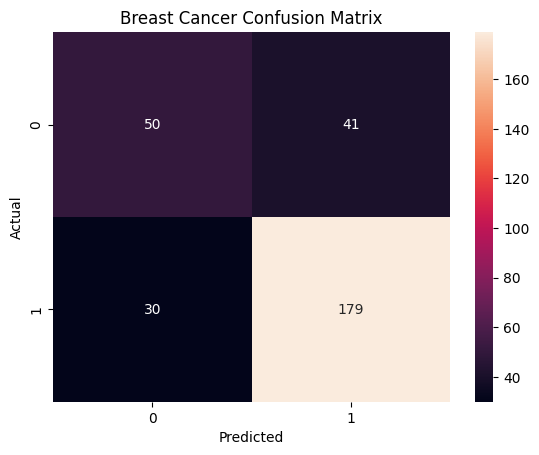

In [29]:
from sklearn.metrics import precision_score
from seaborn import heatmap
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix
print(precision_score(y_test, best_preds, average='macro'))
conf_mat = confusion_matrix(y_test, preds)
ax = heatmap(conf_mat, annot=True, fmt='.4g')
ax.set(ylabel="Actual", xlabel="Predicted", title="Breast Cancer Confusion Matrix")

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),learning_rate=0.3, algorithm='SAMME') #initialize
ada_fit = ada.fit(X_train, y_train)
preds = ada_fit.predict(X_test)

print("precision:", precision_score(y_test, preds))
print("accuracy:", accuracy_score(y_test, preds))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


training time: 0.33513593673706055
testing time: 0.009923696517944336
precision: 0.8093023255813954
accuracy: 0.7466666666666667
